<div class="alert alert-block alert-success">
    
# FIT5196 Task 1 in Assessment 2
#### Student Name: Deshui Yu      Liangjing Yang
#### Student ID: 34253599      34060871

Date: 28/09/2024

    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Patent Files](#examine) <br>
[4. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[4.1. Defining Regular Expressions](#Reg_Exp) <br>
$\;\;\;\;$[4.2. Reading Files](#Read) <br>
$\;\;\;\;$[4.3. Whatever else](#latin) <br>
[5. Writing to CSV/JSON File](#write) <br>
$\;\;\;\;$[5.1. Verification - using the sample files](#test_xml) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

-------------------------------------

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

This project involves cleansing and analyzing a retail transactional dataset from DigiCO, an online electronics store in Melbourne. The task is to detect and fix errors, impute missing values, and remove outliers using exploratory data analysis (EDA). Cleaned data will be saved in the required output files, and the process will be documented in the final report.

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** to manage and analyze data.
* **datetime** to handle dates and times.

In [37]:
pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import math
import ast
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<div class="alert alert-block alert-warning">

## 3.  Examining Raw Data <a class="anchor" name="examine"></a>

 </div>

We can see that the three files contain the following data columns: order_id, customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, and is_happy_customer. Among these, the columns coupon_discount, delivery_charges, number of items in shopping_cart, order_id, customer_id, and latest_customer_review contain no errors.

In the Group181_missing_data.csv file, the is_happy_customer column has missing data, with a data type of float64. The Group181_dirty_data.csv file contains erroneous data, while the Group181_outlier_data.csv file has outlier data.

We can infer relationships between the data based on logic:
##### The date determines the season column.
##### customer_lat and customer_long can be used to calculate and verify distance_to_nearest_warehouse and correspond to the nearest_warehouse.
##### The shopping_cart can be used to calculate order_price, which can further be used to compute order_total.
##### Predict is_happy_customer based on latest_customer_review.
##### It is possible to infer is_expedited_delivery based on the delivery charge, season, distance to nearest warehouse, is_happy_customer


In [3]:
dirty_file_path = 'Group181_dirty_data.csv'
dirty_data = pd.read_csv(dirty_file_path)
dirty_data['error'] = 0
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [4]:
missing_file_path = 'Group181_missing_data.csv'
missing_data = pd.read_csv(missing_file_path)
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [7]:
outlier_file_path = 'Group181_outlier_data.csv'
outlier_data = pd.read_csv(outlier_file_path)
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

<div class="alert alert-block alert-warning"> 

## 4.  Detect and fix errors in dirty_data <a class="anchor" name="load"></a>

</div>

<div class="alert alert-block alert-info">
    
### 4.1. Fix the date and season <a class="anchor" name="Reg_Exp"></a>

Through examining the current data, the issue was identified as the date values, which were supposed to be in the YYYY-MM-DD format, mistakenly being formatted as YYYY-DD-MM and DD-MM-YYYY. Additionally, based on logical reasoning, the date and season are highly correlated, so after fixing the date data, the season data should also be corrected accordingly.

This code is used to find invalid dates in a dataset. First, it tries to convert the values in the 'date' column to a valid date format. If any of the dates are incorrect or cannot be converted, they are marked as "NaT" (Not a Time). Then, it identifies and selects all rows where the date is invalid. Finally, it prints out the invalid dates for review.

In [42]:
# Check and mark invalid dates
# reference from chatGPT
# Temporarily convert the 'date' column to datetime format, marking invalid dates as NaT (Not a Time)
temp_dates = pd.to_datetime(dirty_data['date'], errors='coerce')
# Find the invalid date
invalid_dates_temp = dirty_data[temp_dates.isna()]
print(invalid_dates_temp["date"])

33     2019-20-02
40     01-06-2019
43     2019-18-02
49     05-07-2019
63     03-02-2019
69     2019-13-03
110    2019-15-02
139    10-06-2019
153    05-03-2019
172    2019-21-02
240    2019-21-03
246    2019-20-05
249    10-12-2019
275    06-01-2019
285    2019-17-02
291    2019-21-08
302    08-05-2019
334    07-10-2019
371    2019-15-07
392    05-01-2019
418    05-02-2019
428    12-08-2019
443    2019-18-10
455    07-05-2019
466    2019-30-12
467    2019-22-06
493    06-03-2019
Name: date, dtype: object


This code converts the 'date' column into a valid date format, and any invalid dates are changed to "NaT" (Not a Time). It marks rows with invalid dates by setting an 'error' column to 1. Then, it finds and prints the row numbers where the 'error' is marked as 1, indicating there was a problem with the date in those rows.

In [43]:
# Convert 'date' column to datetime, invalid values become NaT
temp_dates = pd.to_datetime(dirty_data['date'], errors='coerce')
# Mark rows with NaT as 1, indicating an error
dirty_data.loc[temp_dates.isna(), 'error'] = 1
# Get the row indices where 'error' is marked as 1
error_indices = dirty_data.index[dirty_data['error'] == 1]
# Print the indices of these rows
print(error_indices)

Index([ 33,  40,  43,  49,  63,  69, 110, 139, 153, 172, 240, 246, 249, 275,
       285, 291, 302, 334, 371, 392, 418, 428, 443, 455, 466, 467, 493],
      dtype='int64')


This code checks and fixes incorrect date formats in the dataset. It first looks for dates in the 'DD-MM-YYYY' and 'YYYY-DD-MM' formats and converts them to the correct 'YYYY-MM-DD' format. If a date is fixed, it marks the row with an error code of 2. For any dates that don’t fit these patterns, it leaves them unchanged. Finally, it updates the 'date' column with the corrected dates.

In [44]:
# Prepare to fix the dates and mark as corrected
fixed_dates = []
for idx, date_str in enumerate(dirty_data['date'].astype(str)):
    parts = date_str.split('-')
    # Check if format is DD-MM-YYYY and fix to YYYY-MM-DD
    if len(parts) == 3 and int(parts[0]) <= 12 and int(parts[1]) <= 31:
        fixed_dates.append(f'{parts[2]}-{parts[1]}-{parts[0]}')  # DD-MM-YYYY -> YYYY-MM-DD
        dirty_data.loc[idx, 'error'] = 2
    # Check if format is YYYY-DD-MM and fix to YYYY-MM-DD
    elif len(parts) == 3 and int(parts[1]) > 12 and int(parts[2]) <= 12:
        fixed_dates.append(f'{parts[0]}-{parts[2]}-{parts[1]}')  # YYYY-DD-MM -> YYYY-MM-DD
        dirty_data.loc[idx, 'error'] = 2
    # Keep original format for other cases
    else:
        fixed_dates.append(date_str)
dirty_data['date'] = pd.to_datetime(fixed_dates, errors='coerce')


Begin by checking for errors in the season data. Extract the month from the date column and calculate the corresponding season based on the month. Compare the calculated season with the existing season column, and mark any discrepancies as 1 in the error column. Then, replace and correct the season values for the rows marked as incorrect.

In [45]:
dirty_data['date'] = pd.to_datetime(dirty_data['date'], errors='coerce')
# Define a function to get the correct season
def get_correct_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'
    
# Step 1: Flag incorrect season data
# Extract rows without 'error' marks
row_season_data = dirty_data[dirty_data['error'] == 0].copy()
row_season_data['month'] = row_season_data['date'].dt.month
row_season_data['correct_season'] = row_season_data['month'].apply(get_correct_season)
row_season_data['season_is_wrong'] = row_season_data['season'] != row_season_data['correct_season']
wrong_season_indices = row_season_data.index[row_season_data['season_is_wrong']]
# Mark corresponding rows in dirty_data as 'error'
dirty_data.loc[wrong_season_indices, 'error'] = 1
# Drop temporary columns, ignoring errors for non-existent columns
dirty_data.drop(columns=['month', 'correct_season', 'season_is_wrong'], inplace=True, errors='ignore')
# Get the row indices where 'error' is marked as 1
error_indices = dirty_data.index[dirty_data['error'] == 1]
print(error_indices)

Index([  8,  24,  57,  60,  66,  95, 100, 115, 116, 132, 138, 147, 195, 199,
       211, 212, 213, 222, 245, 250, 255, 267, 323, 446, 462, 468, 496],
      dtype='int64')


To correct the 'season' data based on the month in the 'date' column for rows with an error marked as 1. It assigns the correct season based on the month (e.g., September to November as 'Spring', December to February as 'Summer', etc.). Once fixed, the 'error' is updated to 2. For rows without errors, the original 'season' is kept. Finally, it replaces the old 'season' data with the corrected values and prints the 'date' and 'season' columns.

In [46]:
fixed_seasons = []
# Iterate through each row and fix the season data
for idx, row in dirty_data.iterrows():
    month = row['date'].month  # Extract the month
    # If the 'error' column is 1, fix the season
    if dirty_data.loc[idx, 'error'] == 1:
        if month in [9, 10, 11]:
            fixed_seasons.append('Spring')
        elif month in [12, 1, 2]:
            fixed_seasons.append('Summer')
        elif month in [3, 4, 5]:
            fixed_seasons.append('Autumn')
        elif month in [6, 7, 8]:
            fixed_seasons.append('Winter')
        dirty_data.loc[idx, 'error'] = 2
    else:
        fixed_seasons.append(dirty_data.loc[idx, 'season'])
# Replace the original 'season' column with the fixed seasons
dirty_data['season'] = fixed_seasons
# Print the corrected 'date' and 'season' columns
print(dirty_data[['date', 'season']])

          date  season
0   2019-01-23  Summer
1   2019-11-07  Spring
2   2019-01-14  Summer
3   2019-10-31  Spring
4   2019-04-02  Autumn
..         ...     ...
495 2019-11-03  Spring
496 2019-02-07  Summer
497 2019-05-29  Autumn
498 2019-05-03  Autumn
499 2019-09-06  Spring

[500 rows x 2 columns]


<div class="alert alert-block alert-info">
    
### 4.2. Fix the customer_lat, customer_long , distance_to_nearest_warehouse and nearest_warehouse <a class="anchor" name="Reg_Exp"></a>

Since the location is in Melbourne, this information can be used to verify the correctness of the customer_lat and customer_long coordinates. Using the current latitude and longitude, you can calculate the distance_to_nearest_warehouse by referencing data from warehouse.csv. This allows for checking and confirming the accuracy of the nearest_warehouse assignment based on proximity to the correct warehouse location.

Since the store is located in Melbourne, the latitude should be negative, and the longitude should be positive. Mark the incorrect data accordingly. The issue is found to be a swap between latitude and longitude, so after correcting the values, update the error status.

In [47]:
for idx, row in dirty_data.iterrows():
    lat_issue = row['customer_lat'] > 0  # Latitude should be negative
    long_issue = row['customer_long'] < 0  # Longitude should be positive
    # If there is a latitude or longitude issue, mark the 'error' column as 1
    if lat_issue or long_issue:
        dirty_data.loc[idx, 'error'] = 1 
# Get the row indices where 'error' is marked as 1 in dirty_data
error_indices = dirty_data.index[dirty_data['error'] == 1]
# Print these row indices
print(error_indices)

Index([ 48,  68,  77,  87,  93, 136, 137, 140, 187, 196, 198, 216, 220, 230,
       242, 297, 299, 361, 366, 393, 408, 427, 438, 452, 464, 469, 495],
      dtype='int64')


This code checks and fixes the latitude and longitude values for rows marked with an error (error = 1). If the longitude is negative or the latitude is positive (indicating a possible mix-up), it swaps the latitude and longitude values. After correcting the values, the error code is updated to 2 to show that the row has been fixed.

In [48]:
#Fix rows marked as error == 1 (swap incorrect latitude and longitude)
for idx, row in dirty_data.iterrows():
    # If the 'error' column is marked as 1 for this row, perform the correction
    if dirty_data.loc[idx, 'error'] == 1:
        # Check the condition: latitude is positive or longitude is negative
        condition = (dirty_data.loc[idx, 'customer_long'] < 0) or (dirty_data.loc[idx, 'customer_lat'] > 0)
        if condition:
            # Swap the values of customer_lat and customer_long
            temp_lat = dirty_data.loc[idx, 'customer_lat']
            dirty_data.loc[idx, 'customer_lat'] = dirty_data.loc[idx, 'customer_long']
            dirty_data.loc[idx, 'customer_long'] = temp_lat
            # Update the 'error' column to 2, indicating the row has been corrected
            dirty_data.loc[idx, 'error'] = 2

Using the corrected warehouse and latitude/longitude data, calculate the distance using the Haversine formula. Then, compare the calculated distance with the distance_to_nearest_warehouse for rows where the error column is marked as 0 (indicating no identified issues). If the calculated distance differs from the existing value, replace the distance_to_nearest_warehouse with the new calculated value and update the error column to 2 (indicating the data has been corrected).

In [49]:
# Read warehouse data
warehouse = pd.read_csv("warehouses.csv")
lat = dict(zip(warehouse['names'], warehouse['lat']))
lon = dict(zip(warehouse['names'], warehouse['lon']))
# Define the Haversine formula to calculate the distance between two points
def haversine(lat1, lon1, lat2, lon2):
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
    lat1 = lat1 * math.pi / 180.0
    lat2 = lat2 * math.pi / 180.0
    a = (pow(math.sin(dLat / 2), 2) + 
         pow(math.sin(dLon / 2), 2) * 
         math.cos(lat1) * math.cos(lat2))
    rad = 6378  # Earth's radius in kilometers
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# Initialize the 'distance_computed' column
dirty_data['distance_computed'] = None

# Iterate through each customer record to calculate the distance to the nearest warehouse
for index, row in dirty_data.iterrows():
    customer_lat = row['customer_lat']
    customer_long = row['customer_long']
    nearest_warehouse = row['nearest_warehouse']
    if nearest_warehouse in lat and nearest_warehouse in lon:
        dist = round(haversine(customer_lat, customer_long, lat[nearest_warehouse], lon[nearest_warehouse]), 4)
        dirty_data.loc[index, 'distance_computed'] = dist

This code checks if the original distance to the nearest warehouse matches the newly calculated distance. It operates only on rows where there is no error (error = 0). If the two distances don’t match, it updates the original distance with the correct value and marks the row with an error code of 2. The indices of mismatched rows are recorded in a list. Finally, it removes the distance_computed column, as it's no longer needed.

In [50]:
# Initialize a list to record the indices of rows where the distances don't match
mismatch_indices = []
# Iterate through each row in dirty_data
for idx, row in dirty_data.iterrows():
    # Only operate on rows where error is 0
    if dirty_data.loc[idx, 'error'] == 0:
        # Get the original distance_to_nearest_warehouse and the newly computed distance_computed
        original_distance = dirty_data.loc[idx, 'distance_to_nearest_warehouse']
        computed_distance = dirty_data.loc[idx, 'distance_computed']
        
        # If the two distances are not equal
        if original_distance != computed_distance:
            mismatch_indices.append(idx)
            dirty_data.loc[idx, 'distance_to_nearest_warehouse'] = computed_distance
            dirty_data.loc[idx, 'error'] = 2
# Drop the distance_computed column
dirty_data.drop(columns=['distance_computed'], inplace=True)

From warehouses.csv, it is known that there are only three warehouses: Thompson, Nickolson, and Bakers. Count the current warehouses in the data. For any warehouse not in the specified list of three, mark it as error = 1.It was found that the issue is due to the warehouse names starting with lowercase letters. Update the current warehouse names to have the first letter capitalized. Then, mark the error column as 2.

This code checks if the nearest_warehouse value is one of the three valid options: "Nickolson", "Thompson", or "Bakers". For each row where the error column is marked as 0 (meaning no error yet), it verifies if the nearest_warehouse is correct. If the value is not one of the three valid warehouses, the code marks the error column as 1, indicating an error with the warehouse assignment.

In [51]:
# Count the occurrences of each warehouse in 'nearest_warehouse' column
warehouse_counts = dirty_data['nearest_warehouse'].value_counts()
print(warehouse_counts)

# Iterate through each row in dirty_data
for idx, row in dirty_data.iterrows():
    if dirty_data.loc[idx, 'error'] == 0:
        if dirty_data.loc[idx, 'nearest_warehouse'] not in ["Nickolson", "Thompson", "Bakers"]:
            dirty_data.loc[idx, 'error'] = 1

nearest_warehouse
Thompson     187
Nickolson    186
Bakers       108
bakers         9
thompson       7
nickolson      3
Name: count, dtype: int64


This code checks rows where the error column is marked as 1 and looks at the nearest_warehouse value. If the warehouse name is one of the three valid options ("bakers," "thompson," or "nickolson") but written in lowercase, it corrects the name by capitalizing the first letter. After making the correction, it updates the error column to 2, indicating the issue has been fixed.

In [52]:
# Iterate through each row in dirty_data
for idx, row in dirty_data.iterrows():
    # If the 'error' column is marked as 1, check 'nearest_warehouse'
    if dirty_data.loc[idx, 'error'] == 1:
        # Get the current value of 'nearest_warehouse'
        warehouse = dirty_data.loc[idx, 'nearest_warehouse'].lower()  # Convert to lowercase for comparison
        
        # If warehouse is "bakers", "thompson", or "nickolson", capitalize the first letter
        if warehouse in ["bakers", "thompson", "nickolson"]:
            dirty_data.loc[idx, 'nearest_warehouse'] = warehouse.capitalize()  # Capitalize the first letter
            dirty_data.loc[idx, 'error'] = 2  # Mark the 'error' column as 2

<div class="alert alert-block alert-info">
    
### 4.3. Fix the shopping_cart，order_price and order_total <a class="anchor" name="Reg_Exp"></a>

The order_price is calculated based on the items in the shopping_cart, and the order_total is the sum of the order_price and delivery_charges. Therefore, we can infer a relationship between the shopping_cart, order_price, and order_total. I will first need to analyze accurate data to estimate the prices of products from different brands.

This code first checks the number of products sold for each brand in the dataset and calculates the total quantity of each brand’s items. 

In [53]:
# Initialize a Counter to count the sales quantity for each brand
brand_counter = Counter()

# Iterate through the outlier_data dataset to get all the brands
for index, row in outlier_data.iterrows():
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    for item in shopping_cart:
        brand_name = item[0]
        brand_counter[brand_name] += 1
# Get a list of all the brands
item_types = list(brand_counter.keys())
print(item_types)


['iAssist Line', 'Lucent 330S', 'Toshika 750', 'Thunder line', 'Olivia x460', 'Universe Note', 'iStream', 'Alcon 10', 'Candle Inferno', 'pearTV']


It reads the shopping cart information from outlier_data.csv。 Then, it builds a matrix (A) representing the quantity of each brand's products in each order, and a vector (b) containing the total order prices. Using this information, the code estimates the price of each brand’s products by solving a linear equation system. Finally, it rounds the prices and outputs them for each brand.

In [54]:
# Initialize matrix A and vector b
A = np.zeros((len(outlier_data), len(item_types)))  
b = np.zeros(len(outlier_data))  

# Iterate through the outlier_data dataset to fill matrix A and vector b
for index, row in outlier_data.iterrows():
    shopping_cart = ast.literal_eval(row["shopping_cart"])  
    b[index] = row["order_price"]
    for item in shopping_cart:
        brand_name = item[0]
        quantity = item[1]
        if brand_name in item_types:
            item_index = item_types.index(brand_name)
            A[index, item_index] += quantity

# Check for valid rows
valid_indices = np.where(A.any(axis=1) & ~np.isnan(b))[0]
A = A[valid_indices]
b = b[valid_indices]

# Calculate the price for each brand
prices, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Round the prices and convert them into a dictionary
rounded_prices = np.round(prices)
price_dict = dict(zip(item_types, rounded_prices))

# Output the price for each brand
print("Brand Prices (Rounded):")
for brand, price in price_dict.items():
    print(f"Brand: {brand}, Price: {int(price)}")

Brand Prices (Rounded):
Brand: iAssist Line, Price: 2225
Brand: Lucent 330S, Price: 1230
Brand: Toshika 750, Price: 4320
Brand: Thunder line, Price: 2180
Brand: Olivia x460, Price: 1225
Brand: Universe Note, Price: 3450
Brand: iStream, Price: 150
Brand: Alcon 10, Price: 8950
Brand: Candle Inferno, Price: 430
Brand: pearTV, Price: 6310


This code calculates the total price for each order based on the shopping cart. It first converts the shopping cart information into a Python list. If the 'error' column is 0 (indicating no error), it calculates the total price by multiplying the quantity of each item by its price from the price_dict. The computed total is then stored in the 'order_computed' column. If there is an error (i.e., 'error' is not 0), it just copies the 'order_price' value into the 'order_computed' column.

In [55]:
dirty_data['order_computed'] = None
# Iterate through each row in the data
for idx, row in dirty_data.iterrows():
    # Convert the 'shopping_cart' column string to a Python list
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    
    # If there is no error, calculate the total price of the shopping cart
    if dirty_data.loc[idx, 'error'] == 0:
        total_price = 0
        # Calculate the total price for each item in the cart
        for item in shopping_cart:
            brand, quantity = item  
            if brand in price_dict:
                total_price += price_dict[brand] * quantity
        # Store the calculated total price in 'order_computed'
        dirty_data.loc[idx, 'order_computed'] = total_price
    else:
        # If there is an error, set 'order_computed' to the original order price
        dirty_data.loc[idx, 'order_computed'] = row['order_price']
# print(dirty_data['order_computed'])

This code looks for rows in the dataset where the calculated total (order_computed) does not match the original price (order_price). If there is a mismatch and the error is marked as 0, it changes the error value to 1.

In [56]:
mismatch_rows = dirty_data[dirty_data['order_computed'] != dirty_data['order_price']]
mismatch_indices = mismatch_rows.index.tolist()
for idx in mismatch_indices:
    if dirty_data.loc[idx, 'error'] == 0:
        dirty_data.loc[idx, 'error'] = 1

Next, for each row where the error is 1, it tries to match the order_price by checking different combinations of brands while keeping the quantities of items the same. It creates all possible combinations of brands from the price_dict and calculates the total price for each combination. If the total matches the original price (allowing a difference of up to 5), it updates the shopping cart with the new brand combination, recalculates the total price, and marks the error as 2 (indicating a successful match).

In [57]:
import itertools

# Initialize a list to store successfully matched rows
successful_matches = []

# Iterate through rows where error == 1
for idx, row in dirty_data[dirty_data['error'] == 1].iterrows():
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    original_order_price = row['order_price']

    # Get the quantities of items in the shopping cart
    quantities = [item[1] for item in shopping_cart]

    # Ensure there are enough brands available for the combinations
    if len(quantities) <= len(price_dict):
        brand_combinations = itertools.permutations(price_dict.keys(), len(quantities))

        # Try all possible brand combinations
        for possible_combination in brand_combinations:
            temp_total = 0
            temp_shopping_cart = []

            # Calculate the total using different brand combinations
            for brand, quantity in zip(possible_combination, quantities):
                temp_total += price_dict[brand] * quantity
                temp_shopping_cart.append((brand, quantity))

            # If the new total matches the original price within a margin of 5
            if abs(temp_total - original_order_price) <= 5:
                print(f"Match found at row {idx}, updated shopping cart: {temp_shopping_cart}")
                
                # Update shopping_cart and order_computed in dirty_data
                dirty_data.loc[idx, 'shopping_cart'] = str(temp_shopping_cart)
                dirty_data.loc[idx, 'order_computed'] = temp_total
                dirty_data.loc[idx, 'error'] = 2
                
                successful_matches.append(idx)
                break

Match found at row 4, updated shopping cart: [('Thunder line', 1), ('Universe Note', 1), ('iAssist Line', 2)]
Match found at row 11, updated shopping cart: [('Thunder line', 1), ('Olivia x460', 2), ('Candle Inferno', 1)]
Match found at row 23, updated shopping cart: [('Universe Note', 2), ('Candle Inferno', 2)]
Match found at row 30, updated shopping cart: [('iAssist Line', 1), ('Lucent 330S', 1), ('Universe Note', 1), ('Alcon 10', 1)]
Match found at row 44, updated shopping cart: [('iAssist Line', 1), ('Lucent 330S', 1), ('Toshika 750', 1), ('pearTV', 2)]
Match found at row 56, updated shopping cart: [('Toshika 750', 2), ('Alcon 10', 2), ('Candle Inferno', 2)]
Match found at row 98, updated shopping cart: [('Thunder line', 1), ('Alcon 10', 1), ('iAssist Line', 2)]
Match found at row 130, updated shopping cart: [('Toshika 750', 2), ('Olivia x460', 2), ('Universe Note', 1), ('iStream', 1)]
Match found at row 173, updated shopping cart: [('Toshika 750', 1), ('Alcon 10', 1), ('Candle Infe

This code updates rows where the error is marked as 1. For these rows, it replaces the value of order_price with the value from order_computed, then sets the error to 2 to indicate that the update was successful. After each replacement, it increments a counter (replace_count). Finally, it deletes the order_computed column from the dataset.

In [58]:
# Initialize a counter
replace_count = 0
# Iterate through rows where error == 1
for idx, row in dirty_data[dirty_data['error'] == 1].iterrows():
    # Replace order_price with the value from order_computed
    dirty_data.loc[idx, 'order_price'] = dirty_data.loc[idx, 'order_computed']
    dirty_data.loc[idx, 'error'] = 2
    replace_count += 1
# Remove the order_computed column
dirty_data.drop(columns=['order_computed'], inplace=True)

This code calculates the total price for each order, including delivery charges and any coupon discounts. It first checks if there is no error (i.e., if the 'error' column is 0). If there is no error, it calculates the total price by applying the coupon discount to the order price and then adding the delivery charges. The result is stored in the 'total_computed' column. If there is an error, it simply copies the 'order_total' value into the 'total_computed' column.

In [59]:
# Initialize the total_computed column
dirty_data['total_computed'] = None
# Iterate through each row
for idx, row in dirty_data.iterrows():
    order_price = row['order_price']
    # Calculate the total price if there is no error
    if dirty_data.loc[idx, 'error'] == 0:
        delivery_charges = row['delivery_charges']
        coupon_discount = row['coupon_discount'] / 100  # Convert percentage discount to decimal
        total_computed = order_price * (1 - coupon_discount) + delivery_charges
        dirty_data.loc[idx, 'total_computed'] = total_computed
    else:
        # If there is an error, set total_computed to order_total
        dirty_data.loc[idx, 'total_computed'] = row['order_total']

This code identifies rows where the original order_total and the calculated total_computed don't match. It checks if the error column is 0 for those rows and then changes the error value to 1, marking them as having an issue. After that, it retrieves and prints the row numbers where the error column is marked as 1.

In [60]:
# Identify rows where total_computed and order_total do not match
mismatch_rows = dirty_data[dirty_data['total_computed'] != dirty_data['order_total']]
mismatch_indices = mismatch_rows.index.tolist()

# Update the error column to 1 for rows where there is a mismatch and no prior error
for idx in mismatch_indices:
    if dirty_data.loc[idx, 'error'] == 0:
        dirty_data.loc[idx, 'error'] = 1
        
# Get the indices of rows where the error column is marked as 1
error_indices = dirty_data.index[dirty_data['error'] == 1]

# Print these indices
print(error_indices)

Index([  7,  13,  25,  27,  41,  71, 103, 106, 111, 118, 141, 157, 179, 186,
       268, 289, 300, 316, 357, 358, 379, 404, 410, 448, 449, 481, 487],
      dtype='int64')


This code updates rows where the error value is 1. For each of these rows, it replaces the order_total value with the total_computed value, then changes the error column to 2 to indicate the fix. A counter rreplace_count is incremented each time a replacement is made. Finally, the total_computed column is deleted from the dataset.

In [61]:
# Initialize the counter
rreplace_count = 0

# Iterate through all rows where the error value is 1
for idx, row in dirty_data[dirty_data['error'] == 1].iterrows():
  
    # Replace the order_total value with total_computed
    dirty_data.loc[idx, 'order_total'] = dirty_data.loc[idx, 'total_computed']
    
    # Set the error value to 2
    dirty_data.loc[idx, 'error'] = 2
    
    # Increment the counter after each successful replacement
    rreplace_count += 1

# Remove the total_computed column
dirty_data.drop(columns=['total_computed'], inplace=True)

<div class="alert alert-block alert-info">
    
### 4.4. Fix the is_happy_customer<a class="anchor" name="Reg_Exp"></a>

This code uses customer reviews from the latest_customer_review column to predict the sentiment (positive or negative). It first converts the reviews to string format and then applies a function that calculates the sentiment using the SentimentIntensityAnalyzer from NLTK's VADER. If the review is empty or missing, it defaults to a positive sentiment. The function returns True for positive sentiment and False for negative. The results are stored in a new column called test_sentiment, which is then printed for review.

In [62]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download VADER lexicon
nltk.download('vader_lexicon')
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Ensure 'latest_customer_review' column is of string type
dirty_data['latest_customer_review'] = dirty_data['latest_customer_review'].astype(str)

# Define a function to compute sentiment score
def compute_sentiment(review_text):
    if not review_text or review_text.strip() == "None":
        return True
    polarity_score = sia.polarity_scores(review_text)['compound']
    return polarity_score >= 0.05  # True for positive sentiment, False for negative

# Apply sentiment analysis and store results in 'test_sentiment' column
dirty_data['test_sentiment'] = dirty_data['latest_customer_review'].apply(compute_sentiment)
# Print the first few rows to check the results
print(dirty_data[['latest_customer_review', 'test_sentiment']])

                                latest_customer_review  test_sentiment
0    love my upgraded i love all the accessories th...            True
1                                                  nan           False
2    confuse. so far unable to get it to recognize ...           False
3    junk. i've had the note 5 for about a year now...           False
4    five stars excellent device after using it for...            True
..                                                 ...             ...
495  good celular it a very good celular,the price ...            True
496  s7 camera error my camera stopped working afte...           False
497  a simple phone for talk and text this is a sim...            True
498  do not buy! this is a terrible product. it was...           False
499                                           love it.            True

[500 rows x 2 columns]


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


This code updates rows where the test_sentiment value doesn't match the is_happy_customer value. It checks each row where the error column is 0. If there is a mismatch between test_sentiment and is_happy_customer, it updates is_happy_customer with the test_sentiment value, marks the error column as 2, and records the row index. Finally, it prints the list of modified row numbers.

In [63]:
# Initialize a list to store modified row indices
modified_indices = []
# Iterate over rows where error == 0
for idx, row in dirty_data[dirty_data['error'] == 0].iterrows():
    # Check if test_sentiment differs from is_happy_customer
    if row['test_sentiment'] != row['is_happy_customer']:
        dirty_data.loc[idx, 'is_happy_customer'] = row['test_sentiment']
        dirty_data.loc[idx, 'error'] = 2
        modified_indices.append(idx)

print(f"Modified row indices: {modified_indices}")

Modified row indices: [28, 52, 108, 122, 123, 155, 166, 176, 183, 185, 208, 238, 307, 322, 332, 333, 351, 362, 415, 435, 445, 451, 472, 476, 479, 491]


<div class="alert alert-block alert-info">
    
### 4.5. Fix the is_expedited_delivery<a class="anchor" name="Reg_Exp"></a>

The purpose of this code is to train logistic regression models for each season (Spring, Summer, Autumn, and Winter) using data from outlier_data. The models aim to predict whether expedited delivery was chosen based on factors such as delivery charges, customer satisfaction with their last purchase, and the distance to the nearest warehouse. The goal is to prepare for future data cleaning and processing, especially when dealing with the is_expedited_delivery field.

After training the models for each season, they are evaluated using metrics such as Accuracy, Classification Report (including Precision, Recall, and F1-score), and Confusion Matrix to assess the performance and reliability of the predictions.

This approach allows for tailored predictions depending on the season, as each logistic regression model is trained separately for Spring, Summer, Autumn, and Winter.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
outlier_data['transfer_is_happy_customer'] = outlier_data['is_happy_customer'].astype(int)
outlier_data['transfer_is_expedited_delivery'] = outlier_data['is_expedited_delivery'].astype(int)
# 1. Spring Season (Logistic regression model to predict whether expedited delivery was chosen)
spring_data = outlier_data[outlier_data['season'] == 'Spring']
X_spring = spring_data[['delivery_charges', 'transfer_is_happy_customer', 'distance_to_nearest_warehouse']]
y_spring = spring_data['transfer_is_expedited_delivery']

X_train_spring, X_test_spring, y_train_spring, y_test_spring = train_test_split(X_spring, y_spring, test_size=0.2, random_state=42)
log_reg_spring = LogisticRegression()
log_reg_spring.fit(X_train_spring, y_train_spring)

# Evaluate the Spring logistic model
y_pred_spring = log_reg_spring.predict(X_test_spring)
accuracy_spring = accuracy_score(y_test_spring, y_pred_spring)

print(f"Spring Logistic Regression Model Accuracy: {accuracy_spring}")
print(f"Classification Report:\n {classification_report(y_test_spring, y_pred_spring)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_spring, y_pred_spring)}")
print("="*50)

# 2. Summer Season (Logistic regression model to predict whether expedited delivery was chosen)
summer_data = outlier_data[outlier_data['season'] == 'Summer']
X_summer = summer_data[['delivery_charges', 'transfer_is_happy_customer', 'distance_to_nearest_warehouse']]
y_summer = summer_data['transfer_is_expedited_delivery']

X_train_summer, X_test_summer, y_train_summer, y_test_summer = train_test_split(X_summer, y_summer, test_size=0.2, random_state=42)
log_reg_summer = LogisticRegression()
log_reg_summer.fit(X_train_summer, y_train_summer)

# Evaluate the Summer logistic model
y_pred_summer = log_reg_summer.predict(X_test_summer)
accuracy_summer = accuracy_score(y_test_summer, y_pred_summer)

print(f"Summer Logistic Regression Model Accuracy: {accuracy_summer}")
print(f"Classification Report:\n {classification_report(y_test_summer, y_pred_summer)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_summer, y_pred_summer)}")
print("="*50)

# 3. Autumn Season (Logistic regression model to predict whether expedited delivery was chosen)
autumn_data = outlier_data[outlier_data['season'] == 'Autumn']
X_autumn = autumn_data[['delivery_charges', 'transfer_is_happy_customer', 'distance_to_nearest_warehouse']]
y_autumn = autumn_data['transfer_is_expedited_delivery']

X_train_autumn, X_test_autumn, y_train_autumn, y_test_autumn = train_test_split(X_autumn, y_autumn, test_size=0.2, random_state=42)
log_reg_autumn = LogisticRegression()
log_reg_autumn.fit(X_train_autumn, y_train_autumn)

# Evaluate the Autumn logistic model
y_pred_autumn = log_reg_autumn.predict(X_test_autumn)
accuracy_autumn = accuracy_score(y_test_autumn, y_pred_autumn)

print(f"Autumn Logistic Regression Model Accuracy: {accuracy_autumn}")
print(f"Classification Report:\n {classification_report(y_test_autumn, y_pred_autumn)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_autumn, y_pred_autumn)}")
print("="*50)

# 4. Winter Season (Logistic regression model to predict whether expedited delivery was chosen)
winter_data = outlier_data[outlier_data['season'] == 'Winter']
X_winter = winter_data[['delivery_charges', 'transfer_is_happy_customer', 'distance_to_nearest_warehouse']]
y_winter = winter_data['transfer_is_expedited_delivery']

X_train_winter, X_test_winter, y_train_winter, y_test_winter = train_test_split(X_winter, y_winter, test_size=0.2, random_state=42)
log_reg_winter = LogisticRegression()
log_reg_winter.fit(X_train_winter, y_train_winter)

# Evaluate the Winter logistic model
y_pred_winter = log_reg_winter.predict(X_test_winter)
accuracy_winter = accuracy_score(y_test_winter, y_pred_winter)

print(f"Winter Logistic Regression Model Accuracy: {accuracy_winter}")
print(f"Classification Report:\n {classification_report(y_test_winter, y_pred_winter)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_winter, y_pred_winter)}")
print("="*50)

Spring Logistic Regression Model Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

Confusion Matrix:
 [[13  0]
 [ 1 11]]
Summer Logistic Regression Model Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

Confusion Matrix:
 [[15  0]
 [ 1  9]]
Autumn Logistic Regression Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support



This code aims to predict whether expedited delivery was chosen for each row in the dirty_data dataset, based on existing logistic regression models for different seasons (Spring, Summer, Autumn, Winter). It first converts the is_happy_customer and is_expedited_delivery columns to integers, then iterates through each row in dirty_data, selecting the correct model based on the season. Using the models, it predicts if expedited delivery was chosen and stores the result in a new column called my_expedited_delivery. Finally, it displays the original expedited delivery status alongside the predicted one.

In [16]:
dirty_data['transfer_is_happy_customer'] = dirty_data['is_happy_customer'].astype(int)
dirty_data['transfer_is_expedited_delivery'] = dirty_data['is_expedited_delivery'].astype(int)
# Create a list to store predictions
predictions = []

# Iterate over each row in dirty_data and predict based on the season
for index, row in dirty_data.iterrows():
    season = row['season']
    X_input = [[row['delivery_charges'], row['transfer_is_happy_customer'], row['distance_to_nearest_warehouse']]]

    # Select the appropriate model based on the season
    if season == 'Spring':
        prediction = log_reg_spring.predict(X_input)[0]
    elif season == 'Summer':
        prediction = log_reg_summer.predict(X_input)[0]
    elif season == 'Autumn':
        prediction = log_reg_autumn.predict(X_input)[0]
    elif season == 'Winter':
        prediction = log_reg_winter.predict(X_input)[0]
    else:
        prediction = None

    predictions.append(prediction)

# Add predictions as a new column 'my_expedited_delivery'
dirty_data['my_expedited_delivery'] = predictions

# View the results
print(dirty_data[['is_expedited_delivery', 'my_expedited_delivery']])


     is_expedited_delivery  my_expedited_delivery
0                     True                    1.0
1                    False                    0.0
2                     True                    0.0
3                    False                    0.0
4                    False                    1.0
..                     ...                    ...
495                  False                    1.0
496                   True                    1.0
497                  False                    1.0
498                  False                    0.0
499                  False                    0.0

[500 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X 

This code converts the my_expedited_delivery column into boolean values (True for 1, False for 0). It then compares each row's my_expedited_delivery with the is_happy_customer column, and if they are different, it updates is_happy_customer to match my_expedited_delivery. After this, it deletes the my_expedited_delivery and error columns, if they exist, and displays the updated data.

In [17]:
# Convert my_expedited_delivery to boolean (1 for True, 0 for False)
dirty_data['my_expedited_delivery'] = dirty_data['my_expedited_delivery'].astype(bool)

# Iterate over each row and compare my_expedited_delivery with is_happy_customer
for index, row in dirty_data.iterrows():
    # If my_expedited_delivery is different from is_happy_customer, replace the value in is_happy_customer
    if row['my_expedited_delivery'] != row['is_happy_customer']:
        dirty_data.at[index, 'is_happy_customer'] = int(row['my_expedited_delivery'])  # Convert boolean back to int (1 or 0)

# Remove the my_expedited_delivery column and the error column if it exists
dirty_data.drop(columns=['my_expedited_delivery', 'error'], errors='ignore', inplace=True)

# View the updated data
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   order_id                        500 non-null    object 
 1   customer_id                     500 non-null    object 
 2   date                            500 non-null    object 
 3   nearest_warehouse               500 non-null    object 
 4   shopping_cart                   500 non-null    object 
 5   order_price                     500 non-null    int64  
 6   delivery_charges                500 non-null    float64
 7   customer_lat                    500 non-null    float64
 8   customer_long                   500 non-null    float64
 9   coupon_discount                 500 non-null    int64  
 10  order_total                     500 non-null    float64
 11  season                          500 non-null    object 
 12  is_expedited_delivery           500 

<div class="alert alert-block alert-warning"> 

## 5.  Detect and fix errors in outlier_data <a class="anchor" name="load"></a>

</div>

In [33]:
# 统计 my_expedited_delivery 列中值为 1 的行数
count_expedited = dirty_data[dirty_data['my_expedited_delivery'] == 1].shape[0]

# 打印出行数
print(f"Number of rows where 'my_expedited_delivery' is 1: {count_expedited}")



Number of rows where 'my_expedited_delivery' is 1: 472


In [27]:
# 统计 my_expedited_delivery 列中值为 1 的行数
count_expedited = dirty_data[dirty_data['is_expedited_delivery'] == True].shape[0]

# 打印出行数
print(f"Number of rows where 'my_expedited_delivery' is 1: {count_expedited}")

Number of rows where 'my_expedited_delivery' is 1: 222


In [18]:
# 确保 'delivery_charges' 列为整数格式
dirty_data['transfer_delivery_charges'] = dirty_data['delivery_charges'].astype(int)

# 新建一个名为 'my_expedited_delivery' 的新列，初始值为 None
dirty_data['my_expedited_delivery'] = None

# 遍历每个季节，使用对应的模型进行预测
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    # 筛选当前季节的数据
    season_data = dirty_data[dirty_data['season'] == season]
    
    # 为当前季节准备特征矩阵 X
    X_season = season_data[['distance_to_nearest_warehouse', 'transfer_delivery_charges']]
    
    # 根据当前季节选择相应的模型
    if season == 'Spring':
        lm = lm_for_spring
    elif season == 'Summer':
        lm = lm_for_summer
    elif season == 'Autumn':
        lm = lm_for_autumn
    else:  # Winter
        lm = lm_for_winter
    
    # 使用已训练的模型为当前季节预测 'is_expedited_delivery'
    expedited_predictions = lm.predict(X_season)
    
    # 将预测结果四舍五入为二元值 (0 或 1)
    predicted_expedited = (expedited_predictions >= 0.5).astype(int)
    
    # 更新 'my_expedited_delivery' 列，存储预测结果
    dirty_data.loc[dirty_data['season'] == season, 'my_expedited_delivery'] = predicted_expedited

# 打印更新后的数据，检查 'my_expedited_delivery' 列
print(dirty_data[['is_expedited_delivery', 'my_expedited_delivery', 'season']])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- transfer_is_expedited_delivery


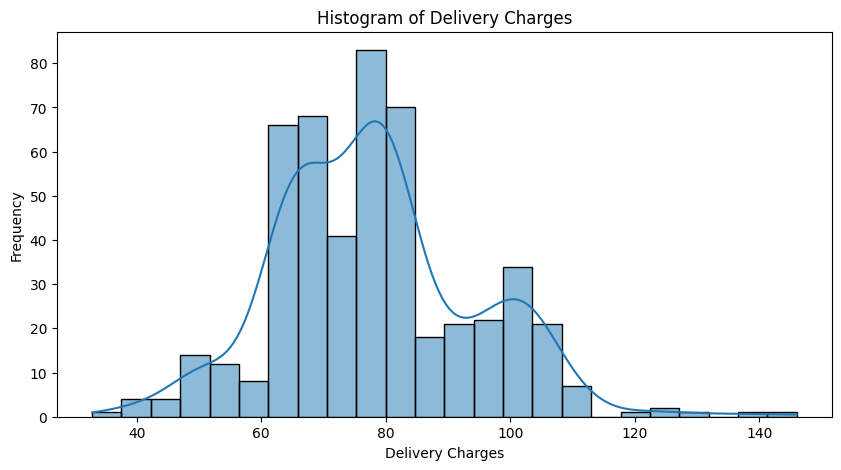

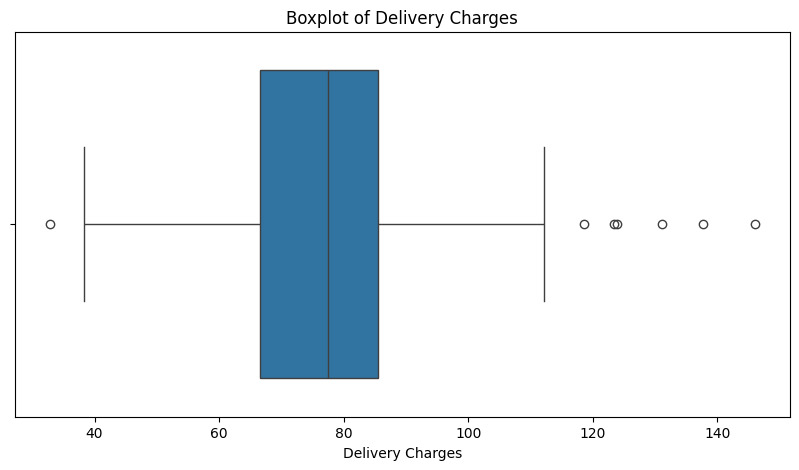

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_data' with your actual DataFrame
# Assuming 'delivery_charges' is the column you're analyzing
plt.figure(figsize=(10, 5))

# Plotting the histogram to check data distribution
sns.histplot(outlier_data['delivery_charges'], kde=True)
plt.title('Histogram of Delivery Charges')
plt.xlabel('Delivery Charges')
plt.ylabel('Frequency')
plt.show()

# Plotting the boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=outlier_data['delivery_charges'])
plt.title('Boxplot of Delivery Charges')
plt.xlabel('Delivery Charges')
plt.show()

In [134]:

# 计算 delivery_charges 的均值和标准差
mean_delivery_charges = outlier_data['delivery_charges'].mean()
std_delivery_charges = outlier_data['delivery_charges'].std()

# 使用 3 Sigma 法则确定上下界
lower_bound = mean_delivery_charges - 3 * std_delivery_charges
upper_bound = mean_delivery_charges + 3 * std_delivery_charges

# 识别离群点（低于下界或高于上界）
outliers = outlier_data[(outlier_data['delivery_charges'] < lower_bound) | (outlier_data['delivery_charges'] > upper_bound)]

# 打印检测出的离群值
print(f"检测出的离群值有 {len(outliers)} 行数据")
print(outliers[['delivery_charges']])

# 从原始数据中移除离群点的行
cleaned_data = outlier_data.drop(outliers.index)

# 保存处理后的数据
cleaned_data.to_csv('cleaned_outlier_data.csv', index=False)

# 检查移除离群点后的数据
print(f"移除后剩余的行数: {len(cleaned_data)}")

检测出的离群值有 3 行数据
     delivery_charges
276           137.670
330           145.995
472           131.070
移除后剩余的行数: 497


In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = outlier_data['delivery_charges'].quantile(0.25)
Q3 = outlier_data['delivery_charges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for outliers (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = outlier_data[(outlier_data['delivery_charges'] < lower_bound) | (outlier_data['delivery_charges'] > upper_bound)]

# Print the number of detected outliers and display the rows with outliers
print(f"检测出的离群值有 {len(outliers)} 行数据")
print(outliers[['delivery_charges']])

# Remove the outliers from the original data
cleaned_data = outlier_data.drop(outliers.index)

# Save the cleaned data to a CSV file
cleaned_data.to_csv('cleaned_outlier_data_iqr.csv', index=False)

# Print the number of remaining rows after removing outliers
print(f"移除后剩余的行数: {len(cleaned_data)}")


检测出的离群值有 7 行数据
     delivery_charges
70            123.885
154            32.865
213           123.405
276           137.670
330           145.995
472           131.070
474           118.620
移除后剩余的行数: 493


In [21]:
import pandas as pd
import numpy as np
import nltk
import ast
from sklearn.linear_model import LinearRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import stats


In [22]:
# 加载数据
df = pd.read_csv('Group181_missing_data.csv')


# 检查 'customer_id' 和 'order_id' 是否有重复
duplicate_customers = df[df.duplicated(subset=['customer_id'], keep=False)]
duplicate_orders = df[df.duplicated(subset=['order_id'], keep=False)]

# 输出重复的客户ID和订单ID
print(f"重复的 customer_id: {duplicate_customers['customer_id'].unique()}")
print(f"重复的 order_id: {duplicate_orders['order_id'].unique()}")

# 删除那些特征列中有 50% 以上为空值的行
cleaned_data = df.dropna(thresh=len(df.columns) * 0.5)
print(f"删除缺失值较多的行后的数据行数: {len(cleaned_data)}")


df = cleaned_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [23]:


# 读取仓库数据
warehouse = pd.read_csv("warehouses.csv")

# 创建字典，将仓库名称与对应的纬度和经度配对
lat = dict(zip(warehouse['names'], warehouse['lat']))
lon = dict(zip(warehouse['names'], warehouse['lon']))

# 定义哈弗赛因公式计算两点之间的距离
def haversine(lat1, lon1, lat2, lon2):
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
    lat1 = lat1 * math.pi / 180.0
    lat2 = lat2 * math.pi / 180.0

    a = (pow(math.sin(dLat / 2), 2) + 
         pow(math.sin(dLon / 2), 2) * 
         math.cos(lat1) * math.cos(lat2))

    # 地球半径（单位：公里）
    rad = 6378
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# 检查 nearest_warehouse 列中缺失值的行
missing_warehouse_rows = df['nearest_warehouse'].isnull() | df['distance_to_nearest_warehouse'].isnull()

# 遍历每个缺失 nearest_warehouse 的客户记录
for index, row in df[missing_warehouse_rows].iterrows():
    customer_lat = row['customer_lat']
    customer_long = row['customer_long']
    
    # 初始化一个大的最小距离
    min_distance = float('inf')
    closest_warehouse = None
    
    # 遍历所有仓库，计算客户与仓库的距离
    for warehouse_name in lat.keys():
        warehouse_lat = lat[warehouse_name]
        warehouse_lon = lon[warehouse_name]
        
        # 计算客户到该仓库的距离
        dist = haversine(customer_lat, customer_long, warehouse_lat, warehouse_lon)
        
        # 找到距离最近的仓库
        if dist < min_distance:
            min_distance = dist
            closest_warehouse = warehouse_name
    
    # 将最近的仓库名称填补到 nearest_warehouse 列
    df.loc[index, 'nearest_warehouse'] = closest_warehouse
    df.loc[index, 'distance_to_nearest_warehouse'] = round(min_distance, 4)

# 检查结果
print(df.loc[missing_warehouse_rows, ['customer_lat', 'customer_long', 'nearest_warehouse']])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD295283,ID4716795524,2019-03-15,Thompson,"[('Toshika 750', 2), ('Alcon 10', 1), ('iAssis...",19815.0,64.96,-37.818902,144.953131,0,19879.96,Autumn,True,0.8746,don’t buy it didn’t work in the slightest bit....,0
1,ORD103517,ID0576824418,2019-12-06,Nickolson,"[('iStream', 2), ('Olivia x460', 1)]",1525.0,96.51,-37.819772,144.980934,10,1469.01,Summer,True,1.0095,still learning this phone seems to be as durab...,1
2,ORD277034,ID0370750698,2019-04-18,Bakers,"[('Thunder line', 1), ('Toshika 750', 1), ('Ca...",6930.0,65.12,-37.813365,144.988465,0,6995.12,Autumn,False,0.7034,"great toshika phone everything is great, but v...",1
3,ORD464494,ID6167357828,2019-06-30,Nickolson,"[('Universe Note', 2), ('Thunder line', 2), ('...",20210.0,80.04,-37.807732,144.970840,5,19279.54,Winter,True,1.2146,perfect! looks brand new.,1
4,ORD199526,ID5967784022,2019-08-24,Nickolson,"[('Toshika 750', 2), ('Candle Inferno', 2)]",9500.0,NaN,-37.804218,144.967611,0,9580.81,Winter,True,1.6095,five stars as advertised. thank you!,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD399422,ID0733678621,2019-06-27,Nickolson,"[('Toshika 750', 1), ('iStream', 2), ('pearTV'...",10930.0,79.81,-37.823848,144.982519,25,8277.31,Winter,True,1.2815,five stars good phone,1
496,ORD279254,ID0541122861,2019-01-03,Bakers,"[('Olivia x460', 2), ('Lucent 330S', 1), ('Tos...",12450.0,64.66,-37.801975,145.011237,5,11892.16,Summer,False,1.6670,one star is not unlocked,0
497,ORD382231,ID2967053355,2019-08-22,Bakers,"[('iAssist Line', 2), ('Universe Note', 2), ('...",20600.0,62.21,-37.807452,144.998738,15,17572.21,Winter,False,0.4186,great great loved the phone,1
498,ORD227014,ID0845656321,2019-04-22,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2), ('Olivi...",26980.0,NaN,-37.818057,144.967661,25,20313.02,Autumn,True,0.1767,i would like to try the product for free i wou...,1


In [33]:
# 初始化一个 Counter 来统计每个品牌的销售数量
brand_counter = Counter()

# 遍历 missingdata 数据集以获取所有品牌
for index, row in df.iterrows():
    # 将 shopping_cart 列的字符串转换为 Python 列表
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    # 遍历购物车中的每个商品
    for item in shopping_cart:
        brand_name = item[0]  # 获取商品的品牌名称
        brand_counter[brand_name] += 1  # 统计每个品牌的出现次数

# 获取所有的品牌列表
item_types = list(brand_counter.keys())
print(item_types)

# 初始化矩阵 A 和向量 b 的大小应该与数据集的长度匹配
num_rows = len(outlier_data)
num_items = len(item_types)

A = np.zeros((num_rows, num_items))  # 矩阵 A 的形状是 (订单数量, 品牌数量)
b = np.zeros(num_rows)  # b 是存储订单价格的向量

# 遍历 outlier_data 数据集来填充矩阵 A 和向量 b
for index, row in outlier_data.iterrows():
    shopping_cart = ast.literal_eval(row["shopping_cart"])  # 将 shopping_cart 列的字符串形式转换为 Python 列表
    b[index] = row["order_price"]  # 将订单的价格存储到向量 b 中

    # 遍历购物车中的每个商品和数量
    for item in shopping_cart:
        brand_name = item[0]
        quantity = item[1]
        # 如果商品属于已知的 item_types
        if brand_name in item_types:
            # 找到该商品在 item_types 列表中的索引
            item_index = item_types.index(brand_name)
            # 将商品的数量添加到矩阵 A 的相应位置
            A[index, item_index] += quantity

# 检查 A 和 b 中是否有全为零的行或无效值
valid_indices = np.where(A.any(axis=1) & ~np.isnan(b))[0]
A = A[valid_indices]
b = b[valid_indices]

# 使用 np.linalg.lstsq() 计算每个品牌的价格
prices, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# 对价格进行四舍五入处理
rounded_prices = np.round(prices)

# 输出品牌价格
price_dict = dict(zip(item_types, rounded_prices))
print(price_dict)


特征中的缺失值:
 distance_to_nearest_warehouse    0
is_expedited_delivery            0
is_happy_customer                0
dtype: int64
模型训练完成。
没有缺失的 'delivery_charges' 值需要预测。


In [22]:
# 填补 missingdata 中的 order_price
df['order_computed'] = None  # 初始化列，用于存储计算出的订单价格

# 遍历每一行数据，计算每个订单的总价
for idx, row in df.iterrows():
    # 将购物车字符串转换为 Python 列表
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    
    total_price = 0
    # 遍历购物车中的每个商品
    for item in shopping_cart:
        brand, quantity = item  # 获取品牌和数量
        # 如果品牌存在于 price_dict 中
        if brand in price_dict:
            # 计算当前商品的总价
            total_price += price_dict[brand] * quantity
    
    # 将计算的总价存入 order_computed 列
    df.loc[idx, 'order_computed'] = total_price

# 找出 order_price 缺失的行，并用计算出来的总价进行填补
missing_orderprice_rows = df['order_price'].isnull()

# 用计算出的总价填补缺失的 order_price
df.loc[missing_orderprice_rows, 'order_computed'] = df.loc[missing_orderprice_rows, 'order_computed'].astype(float)
df.loc[missing_orderprice_rows, 'order_price'] = df.loc[missing_orderprice_rows, 'order_computed']
# 输出填补后的数据，确保缺失值已填补
print(df.loc[missing_orderprice_rows, ['order_id', 'order_price', 'order_computed']])

# 移除 order_computed 列，因为它只是为了计算临时使用
df.drop(columns=['order_computed'], inplace=True)
df.info()

(array([ 36,  65, 106, 114, 117, 191, 320, 435]), array([2, 0, 1, 1, 2, 2, 2, 0]))
将第 36 行, distance_to_nearest_warehouse 列的异常值替换为中位数: 1.0591
将第 65 行, order_price 列的异常值替换为中位数: 13220.0
将第 106 行, order_total 列的异常值替换为中位数: 11735.52
将第 114 行, order_total 列的异常值替换为中位数: 11735.52
将第 117 行, distance_to_nearest_warehouse 列的异常值替换为中位数: 1.0591
将第 191 行, distance_to_nearest_warehouse 列的异常值替换为中位数: 1.0591
将第 320 行, distance_to_nearest_warehouse 列的异常值替换为中位数: 1.0591
将第 435 行, order_price 列的异常值替换为中位数: 13220.0


In [14]:
sia = SentimentIntensityAnalyzer()
df['is_happy_customer'] = df.apply(
    lambda row: 1 if pd.isnull(row['is_happy_customer']) and sia.polarity_scores(row['latest_customer_review'])['compound'] >= 0.05 
    else (0 if pd.isnull(row['is_happy_customer']) else row['is_happy_customer']),
    axis=1
)

df


NameError: name 'df' is not defined

In [3]:
df['is_expedited_delivery'] = df['is_expedited_delivery'].astype(int)
df['is_happy_customer'] = df['is_happy_customer'].astype(int)

# 删除 delivery_charges 列中缺失值对应的行，确保用于训练的 y 没有缺失值
df_cleaned = df.dropna(subset=['delivery_charges'])

# 检查数值列中的 NaN，并填补或删除
numeric_features = ['distance_to_nearest_warehouse', 'order_price', 'delivery_charges']
df_cleaned[numeric_features] = df_cleaned[numeric_features].fillna(0)  # 可以根据需求选择填补策略

# 计算 Z-scores
z_scores = np.abs(stats.zscore(df_cleaned[numeric_features]))

# 设定阈值（通常为3，表示偏离平均值超过3个标准差的值为异常值）
threshold = 3

# 获取异常值的索引并删除这些异常值
df_cleaned_no_outliers = df_cleaned[(z_scores < threshold).all(axis=1)]

# 查看处理异常值后的数据集大小
print(f"处理异常值后的数据集大小：{df_cleaned_no_outliers.shape}")

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD295283,ID4716795524,2019-03-15,Thompson,"[(Toshika 750, 2), (Alcon 10, 1), (iAssist Lin...",19815.0,64.960,-37.818902,144.953131,0,19879.96,Autumn,True,0.8746,don’t buy it didn’t work in the slightest bit....,0
1,ORD103517,ID0576824418,2019-12-06,Nickolson,"[(iStream, 2), (Olivia x460, 1)]",1525.0,96.510,-37.819772,144.980934,10,1469.01,Summer,True,1.0095,still learning this phone seems to be as durab...,1
2,ORD277034,ID0370750698,2019-04-18,Bakers,"[(Thunder line, 1), (Toshika 750, 1), (Candle ...",6930.0,65.120,-37.813365,144.988465,0,6995.12,Autumn,False,0.7034,"great toshika phone everything is great, but v...",1
3,ORD464494,ID6167357828,2019-06-30,Nickolson,"[(Universe Note, 2), (Thunder line, 2), (Alcon...",20210.0,80.040,-37.807732,144.970840,5,19279.54,Winter,True,1.2146,perfect! looks brand new.,1
4,ORD199526,ID5967784022,2019-08-24,Nickolson,"[(Toshika 750, 2), (Candle Inferno, 2)]",9500.0,77.695,-37.804218,144.967611,0,9580.81,Winter,True,1.6095,five stars as advertised. thank you!,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD399422,ID0733678621,2019-06-27,Nickolson,"[(Toshika 750, 1), (iStream, 2), (pearTV, 1)]",10930.0,79.810,-37.823848,144.982519,25,8277.31,Winter,True,1.2815,five stars good phone,1
496,ORD279254,ID0541122861,2019-01-03,Bakers,"[(Olivia x460, 2), (Lucent 330S, 1), (Toshika ...",12450.0,64.660,-37.801975,145.011237,5,11892.16,Summer,False,1.6670,one star is not unlocked,0
497,ORD382231,ID2967053355,2019-08-22,Bakers,"[(iAssist Line, 2), (Universe Note, 2), (Alcon...",20600.0,62.210,-37.807452,144.998738,15,17572.21,Winter,False,0.4186,great great loved the phone,1
498,ORD227014,ID0845656321,2019-04-22,Nickolson,"[(Alcon 10, 2), (iAssist Line, 2), (Olivia x46...",26980.0,77.695,-37.818057,144.967661,25,20313.02,Autumn,True,0.1767,i would like to try the product for free i wou...,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd


# 确保布尔型数据转换为数值型
df['is_expedited_delivery'] = df['is_expedited_delivery'].astype(int)
df['is_happy_customer'] = df['is_happy_customer'].astype(int)

# 去除列名中的空格或特殊字符
df.columns = df.columns.str.strip()

# 再次进行 One-Hot Encoding for 'season'
if 'season' in df.columns:
    df = pd.get_dummies(df, columns=['season'], drop_first=True)  # 转换季节并删除第一个列以避免多重共线性
else:
    print("未找到 'season' 列，请检查数据。")


# 检查 delivery_charges 是否存在缺失值
missing_delivery_charges = df['delivery_charges'].isnull()

# 删除 delivery_charges 列中缺失值对应的行，确保用于训练的 y 没有缺失值
df_cleaned = df.dropna(subset=['delivery_charges'])

# 重新定义特征，加入 one-hot 编码后的 season 列
features = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer'] + \
           [col for col in df_cleaned.columns if col.startswith('season_')]
X = df_cleaned[features]
y = df_cleaned['delivery_charges']

# 确保输入特征中没有缺失值
missing_values_in_features = df.loc[missing_delivery_charges, features].isnull().sum()
print("特征中的缺失值:\n", missing_values_in_features)

# 如果特征中没有缺失值，则进行模型训练
if missing_values_in_features.sum() == 0:
    # 训练线性回归模型
    model = LinearRegression()
    model.fit(X, y)
    print("模型训练完成。")

    # 预测训练集中的目标变量
    y_pred = model.predict(X)

    # 计算 R² (决定系数)
    from sklearn.metrics import r2_score
    import numpy as np
    
    r2 = r2_score(y, y_pred)

    # 输出模型评估指标
    print(f"模型的 R²: {r2}")
    
else:
    print("特征中存在缺失值，无法训练模型。")

# 使用训练好的模型预测缺失的 delivery_charges
if missing_delivery_charges.sum() > 0:
    X_missing = df.loc[missing_delivery_charges, features]
    print(f"预测数据集的维度: {X_missing.shape}")

    # 进行预测
    predictions = model.predict(X_missing)

    # 将预测结果填充到原数据集中
    df.loc[missing_delivery_charges, 'delivery_charges'] = predictions

    # 打印填补后的数据，确保缺失值已填补
    print("填补后的数据：")
    print(df.loc[missing_delivery_charges, ['order_id', 'delivery_charges']])
else:
    print("没有缺失的 'delivery_charges' 值需要预测。")

In [ ]:
# 确保 delivery_charges 和 order_price 中没有缺失值
missing_delivery_or_price = df['delivery_charges'].isnull() | df['order_price'].isnull()

if missing_delivery_or_price.sum() > 0:
    print("请先填补缺失的 delivery_charges 或 order_price。")
else:
    # 计算并填补缺失的 order_total
    missing_order_total = df['order_total'].isnull()
    
    # 使用 delivery_charges 和 order_price 的和来填补 order_total
    df.loc[missing_order_total, 'order_total'] = (
        df['delivery_charges'] + df['order_price']
    )

    # 打印填补后的数据，检查是否正确填补
    print(df.loc[missing_order_total, ['order_id', 'order_total', 'delivery_charges', 'order_price']])


In [ ]:
df.to_csv('filled_missing_data.csv', index=False)